In [53]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pprint


In [49]:
#use nltk.download() and download only books. Using full download will takeup time and bandwidth
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
!pip install newspaper3k
!pip install flair
!pip install --upgrade "ibm-watson>=4.7.1"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#get a demo article and load it to memory
from newspaper import Article
url = 'https://www.vox.com/recode/22221173/elon-musk-tesla-foundation-philanthropy-wealthiest-person'
article = Article(url)
article.download()
# data = open('Demo_Article.json','r')
article.html
article.parse()
article.authors

['Theodore Schleifer',
 'Zeeshan Aleem',
 'Cameron Peters',
 'Alex Ward',
 'Aja Romano',
 'Jan']

In [4]:
len(article.text)

7795

In [5]:
# Convert the free text into tokens
tokens = word_tokenize(article.text)
print(tokens)


['The', 'richest', 'person', 'in', 'the', 'world', 'would', 'like', 'your', 'help', 'giving', 'away', 'his', 'billions', 'of', 'dollars', '.', 'One', 'of', 'the', 'first', 'things', 'that', 'Elon', 'Musk', ',', 'the', 'founder', 'and', 'CEO', 'of', 'Tesla', ',', 'did', 'upon', 'climbing', 'to', 'the', 'top', 'of', 'American', 'capitalism', 'last', 'week', 'was', 'to', 'ask', 'for', 'any', 'advice', 'about', 'how', 'to', 'climb', 'the', 'ranks', 'of', 'philanthropy', '.', 'Now', 'that', 'he', 'has', 'more', 'money', 'than', 'anyone', 'else', 'on', 'the', 'planet', ',', 'Musk', 'is', 'likely', 'to', 'come', 'under', 'far', 'greater', 'scrutiny', 'than', 'he', 'ever', 'has', 'about', 'how', 'he', 'gives', 'it', 'away', '—', 'or', 'doesn', '’', 't', '.', 'Amazon', 'founder', 'Jeff', 'Bezos', ',', 'whom', 'Musk', 'displaced', 'from', 'the', 'top', 'ranking', ',', 'drew', 'more', 'and', 'more', 'negative', 'attention', 'for', 'his', 'penny-pinching', 'philanthropy', 'as', 'he', 'became', 'we

In [6]:
#identify unique words and single char words
print(len(tokens))
unique = set(tokens)
print('# of Unique tokens',len(unique))
print('# of tokens / len of unique tokens',len(tokens)/len(unique))

1545
# of Unique tokens 572
# of tokens / len of unique tokens 2.7010489510489513


In [7]:
#lets sort here
sorted(unique)
single=[w for w in unique if len(w) == 1 ]
print(len(single))
single

22


['8',
 'I',
 't',
 '&',
 '“',
 ';',
 '5',
 '.',
 '$',
 ',',
 '(',
 ')',
 's',
 ':',
 '@',
 '’',
 '—',
 'a',
 '”',
 'w',
 '6',
 'A']

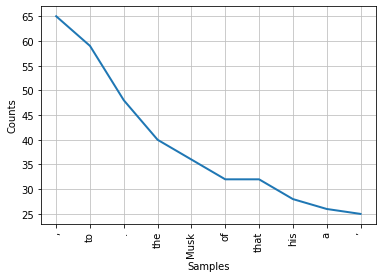

In [8]:
# Frequency distribution of the words
%matplotlib inline
tokens.count('gluten')
fd = nltk.FreqDist(tokens)
fd.most_common(10)
fd.plot(10)

In [9]:
# How long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
fd_wlen

FreqDist({1: 22,
          2: 33,
          3: 57,
          4: 98,
          5: 78,
          6: 69,
          7: 60,
          8: 51,
          9: 39,
          10: 24,
          11: 17,
          12: 13,
          13: 4,
          14: 3,
          15: 4})

In [10]:
#text preprocessing: remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation + "".join(['’' , '“', '”' , '—']) ]
tokens_nop

# Convert all characters to Lower case
tokens_lower=[ t.lower() for t in tokens_nop ]

# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')

# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]

#remove number like characters 
tokens_nostop = [x for x in tokens_nostop if not any(c.isdigit() for c in x)]
FreqDist(tokens_nostop).most_common(10)

[('musk', 36),
 ('foundation', 17),
 ('million', 13),
 ('money', 12),
 ('said', 9),
 ('away', 7),
 ('one', 6),
 ('tesla', 6),
 ('philanthropy', 6),
 ('also', 6)]

In [11]:
# The snowball stemmer -  which supports 13 non-English languages as well!
snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
print(tokens_snow[:10])

['richest', 'person', 'world', 'would', 'like', 'help', 'give', 'away', 'billion', 'dollar']


In [59]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

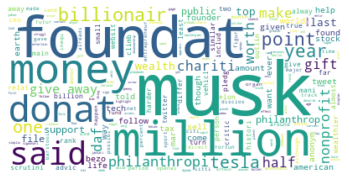

In [61]:
# Let's use Snowball Stemmer's result.
# Further cleaning: filter off anything with less than 3 characters
nltk.FreqDist(tokens_snow).most_common(100)
tokens_clean = [ t for t in tokens_snow if len(t) >= 3 ]
len(tokens_snow)
len(tokens_clean)
nltk.FreqDist(tokens_clean).most_common(50)
fd_clean = nltk.FreqDist(tokens_clean)
text_clean=" ".join(tokens_clean)

wc = WordCloud(background_color="white").generate(text_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc =  nlp("Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%.")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Elon PROPN compound
Musk PROPN nsubj
first ADV advmod
passed VERB ROOT
Bezos PROPN dobj
to PART aux
claim VERB advcl
the DET det
title NOUN dobj
of ADP prep
world NOUN pobj
’s PART punct
richest ADJ amod
person NOUN appos
last ADJ amod
Friday PROPN npadvmod
, PUNCT punct
but CCONJ cc
then ADV advmod
dropped VERB conj
to ADP prep
the DET det
No NOUN dep
. NOUN nmod
two NUM nummod
spot NOUN pobj
on ADP prep
Monday PROPN pobj
as SCONJ mark
Tesla PROPN compound
shares NOUN nsubj
fell VERB advcl
nearly ADV advmod
8 NUM nummod
% NOUN npadvmod
. PUNCT punct


In [13]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Elon Musk 0 9 PERSON
Bezos 23 28 PERSON
last Friday 74 85 DATE
two 115 118 CARDINAL
Monday 127 133 DATE
Tesla 137 142 ORG
nearly 8% 155 164 PERCENT


POST Tag followed by NE Chunk

In [21]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)

Elon Musk Musk nsubj passed
Bezos Bezos dobj passed
the title title dobj claim
world world pobj of
richest person person appos title
the No. two spot spot pobj to
Monday Monday pobj on
Tesla shares shares nsubj fell


In [16]:
# object and subject constants
OBJECT_DEPS = {"dobj", "dative", "attr", "oprd"}
SUBJECT_DEPS = {"nsubj", "nsubjpass", "csubj", "agent", "expl"}
# tags that define wether the word is wh-
WH_WORDS = {"WP", "WP$", "WRB"}

# extract the subject, object and verb from the input
def extract_svo(doc):
    sub = []
    at = []
    ve = []
    for token in doc:
        # is this a verb?
        if token.pos_ == "VERB":
            ve.append(token.text)
        # is this the object?
        if token.dep_ in OBJECT_DEPS or token.head.dep_ in OBJECT_DEPS:
            at.append(token.text)
        # is this the subject?
        if token.dep_ in SUBJECT_DEPS or token.head.dep_ in SUBJECT_DEPS:
            sub.append(token.text)
    return " ".join(sub).strip().lower(), " ".join(ve).strip().lower(), " ".join(at).strip().lower()

def is_question(doc):
    # is the first token a verb?
    if len(doc) > 0 and doc[0].pos_ == "VERB":
        return True, ""
    # go over all words
    for token in doc:
        # is it a wh- word?
        if token.tag_ in WH_WORDS:
            return True, token.text.lower()
    return False, ""

In [22]:
subject, verb, attribute = extract_svo(doc)

In [23]:
subject

'elon musk tesla shares'

In [19]:
verb

'passed claim dropped fell'

In [20]:
attribute

'bezos the title of ’s person'

In [33]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(doc.text)
classifier.predict(sentence)
print(doc.text)
print(type(doc.text))
print('The sentence is:', sentence.labels)




2021-01-18 00:24:03,009 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%.
<class 'str'>
The sentence is: [NEGATIVE (0.9995)]


In [57]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('ElQoBZw54M3T7MguJWppYjUj2DN9uYyiomhpCaa4pkB0')
version = '2021-01-18'
tone_analyzer = ToneAnalyzerV3(
    version=version,
    authenticator=authenticator
)

tone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/133fb2cc-0314-48b9-b027-c4965e15bd56')


result = tone_analyzer.tone(
    doc.text,
    content_type='text/plain;charset=utf-8', 
    content_language = 'en'
).get_result()

print(doc.text, "\n")

pp =pprint.PrettyPrinter(indent = 4)
pp.pprint(result)

Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%.
{   'document_tone': {   'tones': [   {   'score': 0.567827,
                                          'tone_id': 'sadness',
                                          'tone_name': 'Sadness'}]}}


In [58]:
result = tone_analyzer.tone(
    article.text,
    content_type='text/plain;charset=utf-8', 
    content_language = 'en'
).get_result()

pp.pprint(result)

{   'document_tone': {   'tones': [   {   'score': 0.574646,
                                          'tone_id': 'sadness',
                                          'tone_name': 'Sadness'},
                                      {   'score': 0.604453,
                                          'tone_id': 'joy',
                                          'tone_name': 'Joy'},
                                      {   'score': 0.558428,
                                          'tone_id': 'tentative',
                                          'tone_name': 'Tentative'},
                                      {   'score': 0.652251,
                                          'tone_id': 'analytical',
                                          'tone_name': 'Analytical'}]},
    'sentences_tone': [   {   'sentence_id': 0,
                              'text': 'The richest person in the world would '
                                      'like your help giving away his billions '
                    